In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import LabelEncoder
df=pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [5]:
le_parent=LabelEncoder()
le_test_prep=LabelEncoder()
le_gender=LabelEncoder()
df['parental level of education']=le_parent.fit_transform(df['parental level of education'])
df['test preparation course']=le_test_prep.fit_transform(df['test preparation course'])
df['gender']=le_gender.fit_transform(df['gender'])
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,group B,1,standard,1,72,72,74
1,0,group C,4,standard,0,69,90,88
2,0,group B,3,standard,1,90,95,93
3,1,group A,0,free/reduced,1,47,57,44
4,1,group C,4,standard,1,76,78,75


In [6]:
df['parental level of education'].unique()

array([1, 4, 3, 0, 2, 5])

In [7]:
X=df[['parental level of education','test preparation course']]
y=df['math score']
model=LinearRegression()
model.fit(X,y)
pred_value=model.predict([[1,0]])
print(pred_value)

[70.62473246]


d:\downloads\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [8]:
X1=df[['parental level of education']]
y1=df['math score']
model1=LinearRegression()
model1.fit(X1,y1)
pred_value1=model1.predict([[1]])
print(pred_value1)

[66.92992532]


d:\downloads\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [9]:
X2=df[['test preparation course']]
y2=df['math score']
model2=LinearRegression()
model2.fit(X2,y2)
pred_value2=model2.predict([[0]])
print(pred_value2)

[69.69553073]


d:\downloads\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


the variable which most important influences the student performance is 'test preparation course'


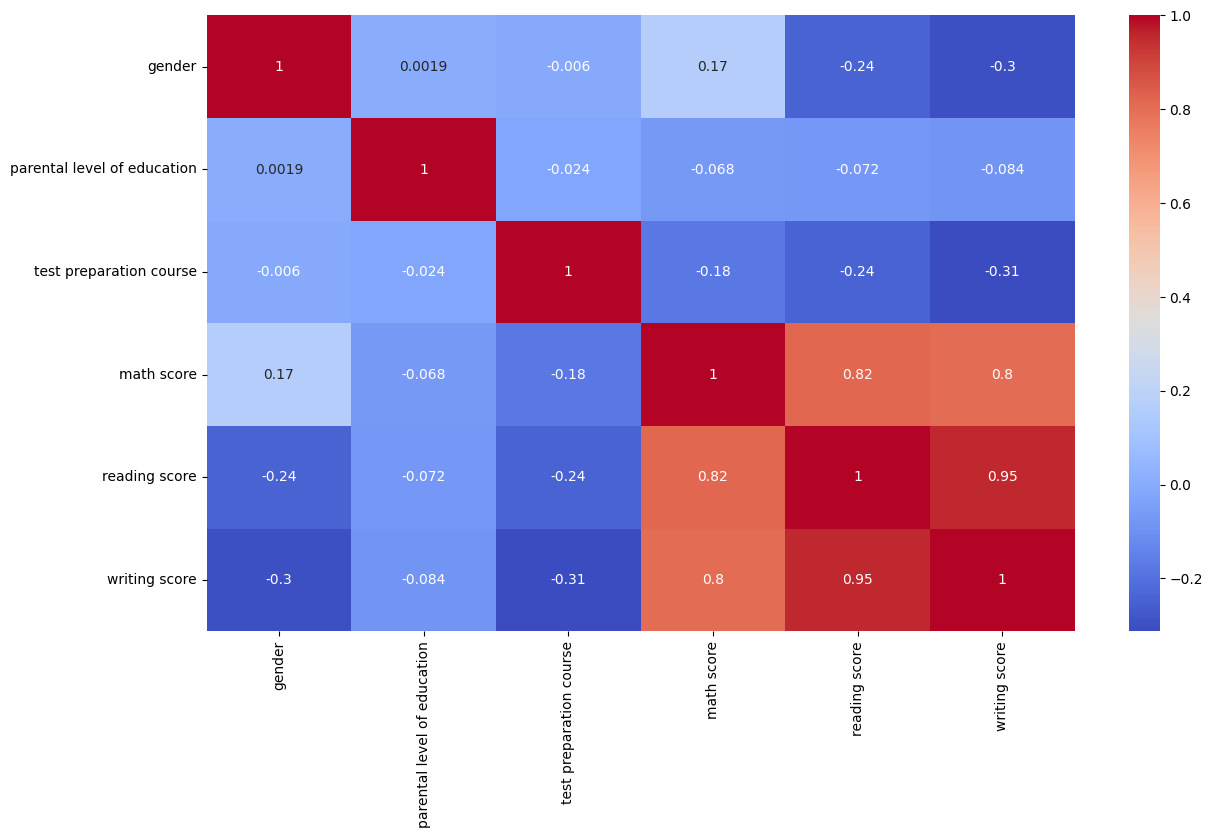

In [10]:
corr = df.select_dtypes(include=np.number).corr()
plt.figure(figsize=(14,8))
sns.heatmap(corr,cmap='coolwarm', annot=True)
plt.show()

gender                         0.072155
parental level of education   -0.030147
test preparation course       -0.593282
math score                    -0.278935
reading score                 -0.259105
writing score                 -0.289444
dtype: float64


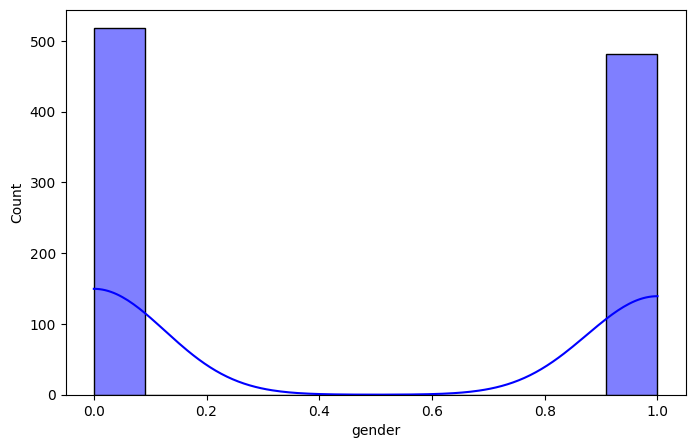

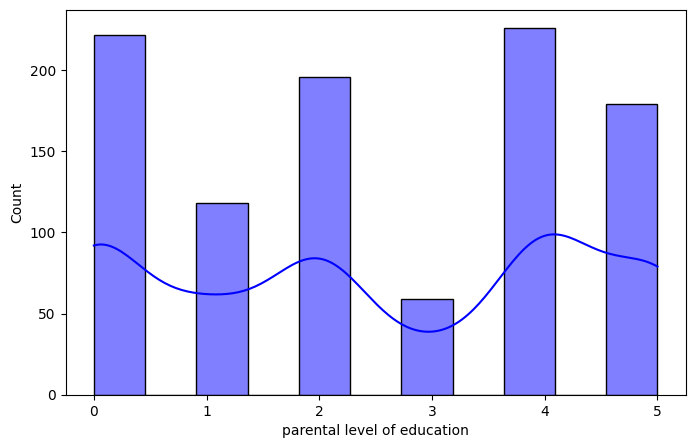

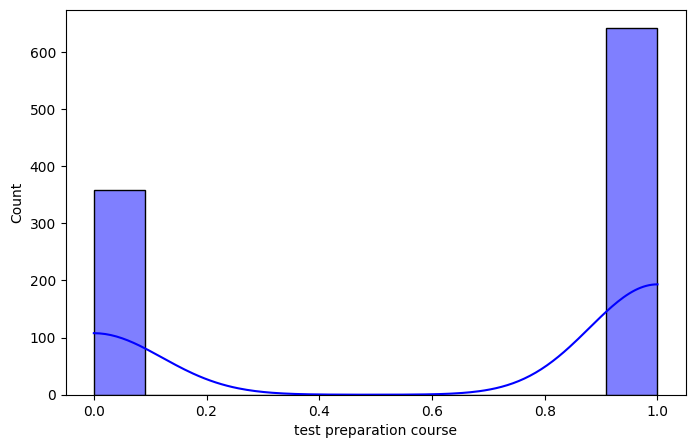

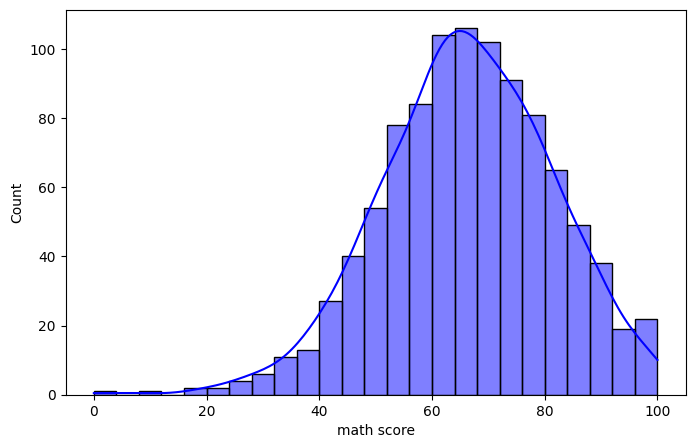

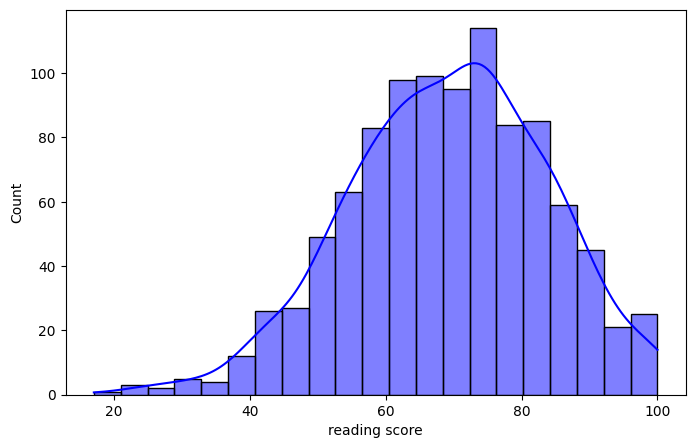

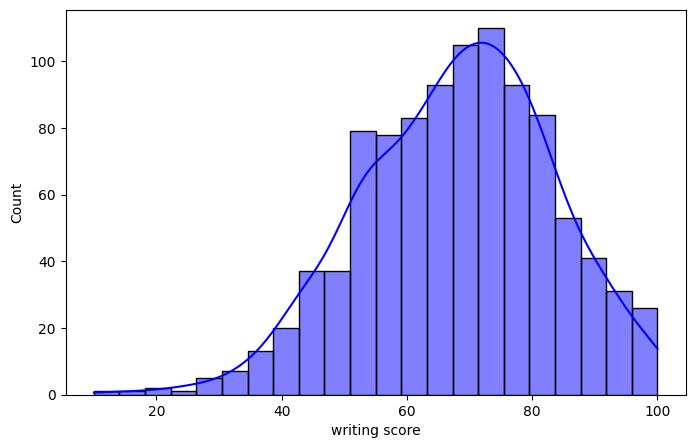

In [11]:
num_col=df.select_dtypes(include=np.number)
print(num_col.skew())
for col in num_col:
    plt.figure(figsize=(8,5))
    sns.histplot(num_col[col], kde=True,color='blue')
    plt.show()


In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X4 = df[['parental level of education', 'test preparation course', 'math score', 'reading score', 'writing score']]
import statsmodels.api as sm
X_const = sm.add_constant(X4)
vif_data = pd.DataFrame()
vif_data["Feature"] = X4.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i+1) for i in range(X4.shape[1])]  # i+1 because of constant

print(vif_data)

                       Feature        VIF
0  parental level of education   1.011546
1      test preparation course   1.166258
2                   math score   3.085314
3                reading score  12.692927
4                writing score  12.576266


In [13]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,group B,1,standard,1,72,72,74
1,0,group C,4,standard,0,69,90,88
2,0,group B,3,standard,1,90,95,93
3,1,group A,0,free/reduced,1,47,57,44
4,1,group C,4,standard,1,76,78,75


In [14]:
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col])
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


In [15]:
X.head()

,parental level of education,test preparation course
0,1,1
1,4,0
2,3,1
3,0,1
4,4,1


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X = df[['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'reading score', 'writing score']]
y = df['math score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [17]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R² score:", r2)

R² score: 0.8838026201112223


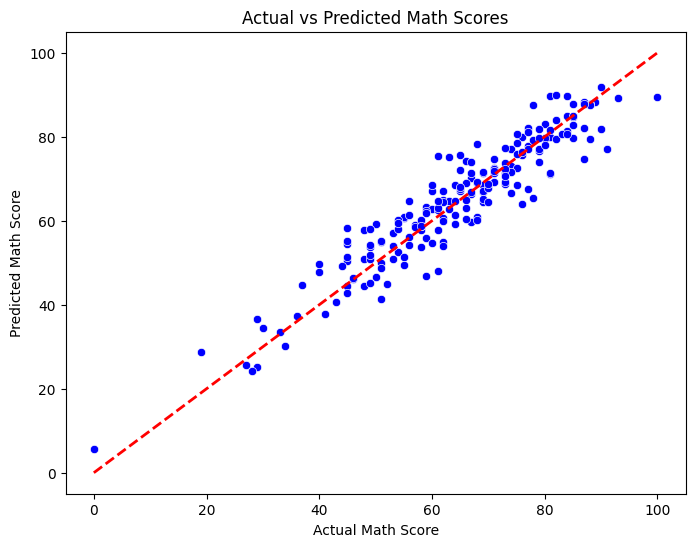

7

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
y_pred = model.predict(X_test)
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
plt.figure(figsize=(8,6))
sns.scatterplot(x='Actual', y='Predicted', data=results, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title("Actual vs Predicted Math Scores")
plt.xlabel("Actual Math Score")
plt.ylabel("Predicted Math Score")
plt.show()
7

In [19]:
import joblib

# Save the trained model for use in app.py (Streamlit)
joblib.dump(model, 'model.pkl')

['model.pkl']